Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-02-12 19:18:55--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.139.173
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.139.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  47.7MB/s    in 4.5s    

2020-02-12 19:19:00 (43.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# make all of the df's for referencing
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products = pd.concat([pd.read_csv('order_products__prior.csv'),
                            pd.read_csv('order_products__train.csv')])
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')


In [0]:
# next thing im going to need is the list of item names to search for
targets=['Banana',
'Bag of Organic Bananas',
'Organic Strawberries',
'Organic Baby Spinach',
'Organic Hass Avocado',
'Organic Avocado',
'Large Lemon',
'Strawberries',
'Limes',
'Organic Whole Milk']

In [0]:
# take a look at the heads of the diffrent product dataframes

# pull product_id with product_name drop 'aisle_id','department_id'
products.head()

In [0]:
# pull order_id with product_id drop 'add_to_cart_order','reordered'
order_products.head(20)

In [0]:
# pull order_number with order_id drop 'user_id','eval_set','order_dow','order_hour_of_day,'days_since_prior_order','order_number'
# note the reason i drop order number here is because if i have every order_id then order number is redundant
# since the order_id's will corrolate to that number
orders.head(20)

In [0]:
# drop columns that i dont need
products=products.drop(['aisle_id','department_id'], axis=1)
order_products=order_products.drop(['add_to_cart_order','reordered'], axis=1)
orders=orders.drop(['user_id','eval_set','order_dow','order_hour_of_day','days_since_prior_order','order_number'], axis=1)

In [0]:
# subset my product df with the target product names
product_subset=products[(products['product_name'].isin(targets))]
# subset my order_products df with the list of product_id's from the previous
order_products_subset=order_products[(order_products['product_id'].isin(product_subset['product_id']))]
# subset my orders df with the list of order_id's from my previous subset
orders_subset=orders[(orders['order_id'].isin(order_products_subset['order_id']))]

In [0]:
product_subset.head(10)

In [0]:
order_product_subset.head(order_product_subset.shape[0])

In [0]:
orders_subset.head(orders_subset.shape[0])

###Merging dataframes together

In [33]:
# going to use testing data frames to make usre i dont break anything

# first i want to merge products_subset and order_products_subset with product_id
t=pd.merge(order_products_subset,product_subset,on='product_id',how='inner')
t.head(20)
# now i want to merge t and orders_subset using order_id
t2=pd.merge(t,orders_subset,on='order_id',how='inner')
t2.head(20)

,order_id,product_id,product_name,order_number
0,3,21903,Organic Baby Spinach,16
1,26,21903,Organic Baby Spinach,2
2,26,24852,Banana,2
3,26,47766,Organic Avocado,2
4,31,21903,Organic Baby Spinach,7
5,39,21903,Organic Baby Spinach,8
6,56,21903,Organic Baby Spinach,8
7,56,47209,Organic Hass Avocado,8
8,57,21903,Organic Baby Spinach,1
9,57,47209,Organic Hass Avocado,1


In [0]:
# i dont particularly need theese columns anymore
final=t2.drop(['order_id','product_id'],axis=1)

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

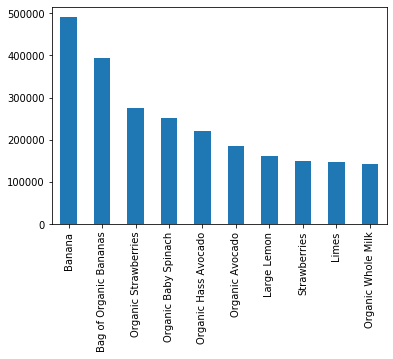

In [53]:
final['product_name'].value_counts().plot(kind='bar');
final['product_name'].value_counts()

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [54]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
table2=table2.reset_index()
table2

In [60]:
# table2 -> tidy
tidy=table2.melt(id_vars='index',value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [61]:
# tidy -> table2
tidy.pivot_table(values='value',index='index',columns='variable')

variable,Jane Doe,John Smith,Mary Johnson
index,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


In [65]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [64]:
# Flights Pivot Table
flights.pivot_table(values='passengers',index='year',columns='month')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
# reload dfs to start fresh
order_products = pd.concat([pd.read_csv('order_products__prior.csv'),
                            pd.read_csv('order_products__train.csv')])
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [0]:

order_products.drop(['add_to_cart_order','reordered'],axis=1,inplace=True)

products.head() # drop 'aisle_id,'department_id'
products.drop(['aisle_id','department_id'],axis=1,inplace=True)

orders.head() #drop 'order_dow','days_since_prior_order','order_number','eval_set'
orders.drop(['order_dow','days_since_prior_order','order_number','eval_set'],axis=1,inplace=True)


In [0]:
# merge df's
m1=pd.merge(order_products,products,on='product_id',how='inner')
m2=pd.merge(m1,orders,on='order_id',how='inner')

In [97]:
m2.head(20)

,order_id,product_id,product_name,user_id,order_hour_of_day
0,2,33120,Organic Egg Whites,202279,9
1,2,28985,Michigan Organic Kale,202279,9
2,2,9327,Garlic Powder,202279,9
3,2,45918,Coconut Butter,202279,9
4,2,30035,Natural Sweetener,202279,9
5,2,17794,Carrots,202279,9
6,2,40141,Original Unflavored Gelatine Mix,202279,9
7,2,1819,All Natural No Stir Creamy Almond Butter,202279,9
8,2,43668,Classic Blend Cole Slaw,202279,9
9,26,33120,Organic Egg Whites,153404,16


In [0]:
late_df=m2[(m2['order_hour_of_day']>12)]


In [104]:
print(late_df['order_hour_of_day'].value_counts())
print()
print(late_df['product_name'].value_counts()[:25])

14    2810918
15    2780731
13    2778054
16    2647695
17    2186409
18    1714445
19    1317576
20    1017958
21     831183
22     662053
23     419585
Name: order_hour_of_day, dtype: int64

Banana                      275720
Bag of Organic Bananas      221476
Organic Strawberries        157296
Organic Baby Spinach        143816
Organic Hass Avocado        126847
Organic Avocado             106522
Large Lemon                  90751
Limes                        84053
Strawberries                 82881
Organic Whole Milk           80125
Organic Raspberries          79601
Organic Yellow Onion         66821
Organic Garlic               65612
Organic Zucchini             62881
Organic Blueberries          59432
Cucumber Kirby               57974
Organic Lemon                52313
Organic Grape Tomatoes       51014
Organic Fuji Apple           50205
Organic Cucumber             49145
Apple Honeycrisp Organic     48111
Seedless Red Grapes          48068
Honeycrisp Apple             46281
Or

I'm not sure whats going on here, i reduced the dataframe to all hours after 1300 and its still saying that the most items in the database are the top 25 food for the day.

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####